In [15]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [3]:
def kmeans_init_centers(X, k):
    # chọn ngẫu nhiên k hàng của X làm tâm ban đầu
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # tính khoảng cách cặp giữa dữ liệu và các tâm cụm
    D = cdist(X, centers)
    # trả về chỉ số của tâm gần nhất
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # thu thập tất cả các điểm được gán cho cụm thứ k
        Xk = X[labels == k, :]
        # lấy trung bình
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # trả về True nếu hai tập hợp các tâm cụm là giống nhau
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [4]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [5]:
import pandas as pd
# Tải dữ liệu
data = pd.read_csv('Countries-exercise.csv')
print(data.head())  # Kiểm tra dữ liệu
total_rows = data.shape[0]
print(f"Tổng số hàng của data: {total_rows}")

          name  Longitude   Latitude
0        Aruba -69.982677  12.520880
1  Afghanistan  66.004734  33.835231
2       Angola  17.537368 -12.293361
3     Anguilla -63.064989  18.223959
4      Albania  20.049834  41.142450
Tổng số hàng của data: 241


In [6]:
from sklearn.preprocessing import StandardScaler

# Chỉ lấy cột tọa độ địa lý
X = data[['Longitude', 'Latitude']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

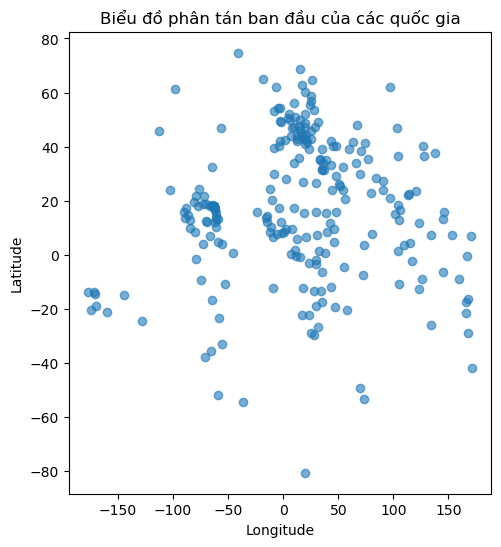

In [18]:
# Tải dữ liệu
data = pd.read_csv('Countries-exercise.csv')

# Giả sử dữ liệu cần phân cụm là các cột 'Longitude' và 'Latitude'
X = data[['Longitude', 'Latitude']].values  # Chuyển đổi thành numpy array

# Hiển thị biểu đồ ban đầu
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Biểu đồ phân tán ban đầu của các quốc gia')
plt.show()

In [19]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

Centers of clusters (custom K-means):
[[ 55.40818419  28.83734022]
 [  6.82194037  39.39586484]
 [ 30.56356479 -13.18482953]
 [130.75669881   6.31280457]
 [-82.03484643   5.55229685]]


Text(0.5, 1.0, 'Biểu đồ phân tán sau khi phân cụm bằng K-means')

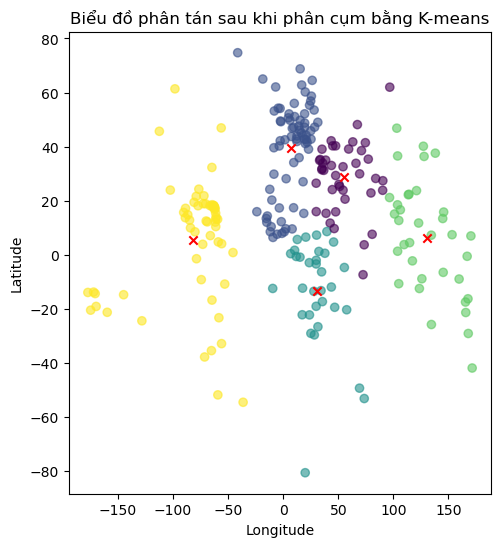

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Các hàm K-means
def kmeans_init_centers(X, k):
    # chọn ngẫu nhiên k hàng của X làm tâm ban đầu
    np.random.seed(42)
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # tính khoảng cách cặp giữa dữ liệu và các tâm cụm
    D = cdist(X, centers)
    # trả về chỉ số của tâm gần nhất
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # thu thập tất cả các điểm được gán cho cụm thứ k
        Xk = X[labels == k, :]
        # lấy trung bình
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers, tol=1e-4):
    # trả về True nếu hai tập hợp các tâm cụm là giống nhau
    return np.all(np.linalg.norm(new_centers - centers, axis=1) < tol)

def kmeans(X, K, max_iters=300, tol=1e-4):
    centers = kmeans_init_centers(X, K)
    for _ in range(max_iters):
        labels = kmeans_assign_labels(X, centers)
        new_centers = kmeans_update_centers(X, labels, K)
        if has_converged(centers, new_centers, tol):
            break
        centers = new_centers
    return centers, labels

# Tải dữ liệu
data = pd.read_csv('Countries-exercise.csv')

# Giả sử dữ liệu cần phân cụm là các cột 'Longitude' và 'Latitude'
X = data[['Longitude', 'Latitude']].values

# Chạy hàm K-means tự viết với số cụm là 5
k = 5
centers_custom, labels_custom = kmeans(X, k)

# In ra giá trị của các tâm cụm từ hàm tự viết
print("Centers of clusters (custom K-means):")
print(centers_custom)

# Hiển thị các center sau khi phân cụm
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(centers_custom[:, 0], centers_custom[:, 1], c='red', marker='x')  # Tâm cụm
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Biểu đồ phân tán sau khi phân cụm bằng K-means')



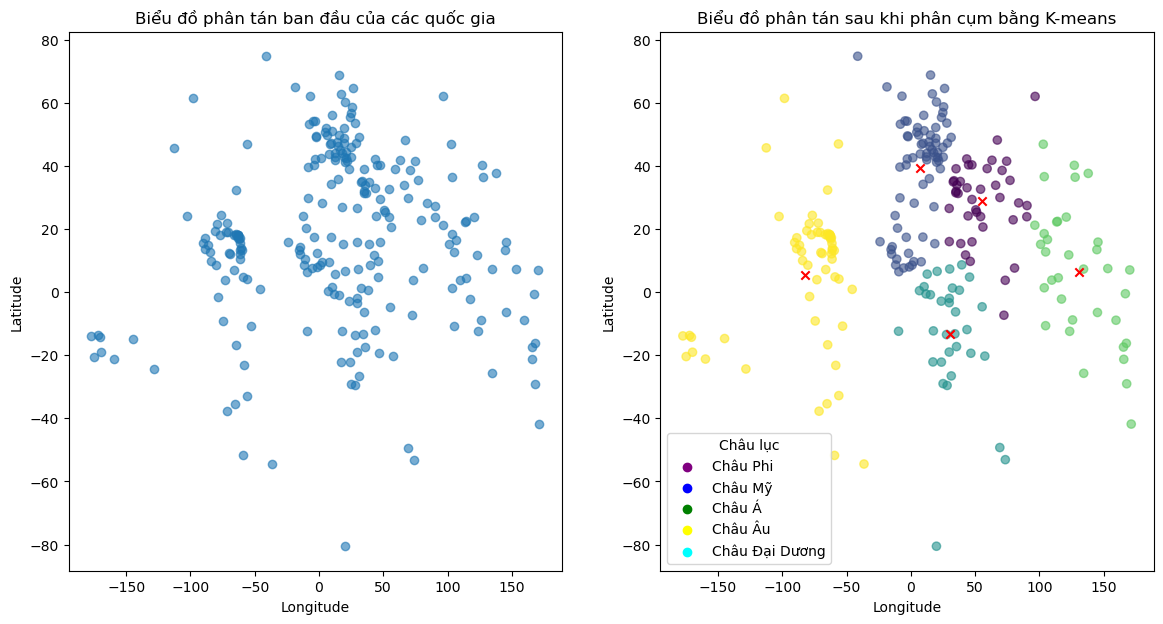

Nhận xét:
Biểu đồ bên trái là biểu đồ phân tán ban đầu của các quốc gia dựa trên tọa độ địa lý (kinh độ và vĩ độ).
Biểu đồ bên phải là biểu đồ sau khi phân cụm bằng thuật toán K-means với số cụm là 5.
Các cụm này có thể đại diện cho việc chia các quốc gia thành 5 châu lục khác nhau.
Các tâm cụm (dấu 'x' màu đỏ) đại diện cho trung tâm của mỗi cụm.


In [24]:
# Hiển thị biểu đồ trước và sau khi phân cụm
plt.figure(figsize=(14, 7))

# Biểu đồ trước khi phân cụm
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Biểu đồ phân tán ban đầu của các quốc gia')

# Biểu đồ sau khi phân cụm
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_custom, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(centers_custom[:, 0], centers_custom[:, 1], c='red', marker='x')  # Tâm cụm
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Biểu đồ phân tán sau khi phân cụm bằng K-means')
# Thêm chú thích cho các cụm
colors = ['purple', 'blue', 'green', 'yellow', 'cyan']
continents = ['Châu Phi', 'Châu Mỹ', 'Châu Á', 'Châu Âu', 'Châu Đại Dương']
for i in range(k):
    plt.scatter([], [], c=colors[i], label=continents[i])
plt.legend(title='Châu lục')
plt.show()

# Nhận xét thực tế
print("Nhận xét:")
print("Biểu đồ bên trái là biểu đồ phân tán ban đầu của các quốc gia dựa trên tọa độ địa lý (kinh độ và vĩ độ).")
print("Biểu đồ bên phải là biểu đồ sau khi phân cụm bằng thuật toán K-means với số cụm là 5.")
print("Các cụm này có thể đại diện cho việc chia các quốc gia thành 5 châu lục khác nhau.")
print("Các tâm cụm (dấu 'x' màu đỏ) đại diện cho trung tâm của mỗi cụm.")